<a href="https://colab.research.google.com/github/ouibaa/PUBH5218/blob/main/Week_1_Generalised_Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercises (Week 1)

## Question 1

In [1]:
# NAME: WEBER LIU
# DATE: 09-03-2021
# USE: EXERCISE 1

In [2]:
# Read data
data = read.csv("https://raw.githubusercontent.com/ouibaa/PUBH5218/main/datasets/bmd_drug.csv")

In [3]:
# import libraries
install.packages("skimr")
library(skimr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
# View dataset
skim(data)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             1077  
Number of columns          11    
_______________________          
Column type frequency:           
  character                3     
  numeric                  8     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 sex                   0             1     1     1     0        2          0
2 fracture              0             1     8    11     0        2          0
3 medication            0             1    13    15     0        3          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate     mean       sd      p0      p25
1 id                    0             1 9712.    8755.      3     21

## Question 2

In [5]:
# calcualte BMI variable
data$bmi = data$weight_kg/ ((data$height_cm / 100) ^ 2)

In [6]:
skim(data)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             1077  
Number of columns          12    
_______________________          
Column type frequency:           
  character                3     
  numeric                  9     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 sex                   0             1     1     1     0        2          0
2 fracture              0             1     8    11     0        2          0
3 medication            0             1    13    15     0        3          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate     mean       sd      p0      p25
1 id                    0             1 9712.    8755.      3     21

## Question 3

In [7]:
help(t.test)

In [8]:
# Comparing hip BMI for men vs. women using unpaired t-test
t.test(bmdtot_hip ~ sex, alternative = "two.sided", var.equal = TRUE, data = data)


	Two Sample t-test

data:  bmdtot_hip by sex
t = -7.8996, df = 1075, p-value = 6.881e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.08480897 -0.05106060
sample estimates:
mean in group F mean in group M 
      0.8178973       0.8858321 


## Question 4

In [9]:
# Running a simple linear regression
hipbmd = glm(bmdtot_hip ~ sex, data = data)
summary(hipbmd)


Call:
glm(formula = bmdtot_hip ~ sex, data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.49613  -0.08650   0.00167   0.08960   0.47657  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.817897   0.005958   137.3  < 2e-16 ***
sexM        0.067935   0.008600     7.9 6.88e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.0198808)

    Null deviance: 22.613  on 1076  degrees of freedom
Residual deviance: 21.372  on 1075  degrees of freedom
AIC: -1159.3

Number of Fisher Scoring iterations: 2


## Question 5

In [14]:
install.packages("jtools")
library(jtools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘pander’




In [16]:
hipbmd.bmi = glm(bmdtot_hip ~ sex + bmi, data = data)
summ(hipbmd.bmi, digits = 3, confint = TRUE)

MODEL INFO:
Observations: 1077
Dependent Variable: bmdtot_hip
Type: Linear regression 

MODEL FIT:
χ²(2) = 4.412, p = 0.000
Pseudo-R² (Cragg-Uhler) = -0.109
Pseudo-R² (McFadden) = -0.212
AIC = -1330.260, BIC = -1310.332 

Standard errors: MLE
----------------------------------------------------------
                     Est.    2.5%   97.5%   t val.       p
----------------- ------- ------- ------- -------- -------
(Intercept)         0.463   0.411   0.515   17.432   0.000
sexM                0.083   0.068   0.099   10.394   0.000
bmi                 0.013   0.011   0.015   13.679   0.000
----------------------------------------------------------

Estimated dispersion parameter = 0.017 

There is a statistically significant positive association between sex and hip BMD when adjusted for BMI. For a fixed value of BMI, the average hip BMD increases by 0.083 (0.068 - 0.099)

## Question 6

In [18]:
hipbmd.bmi_sex = lm(bmdtot_hip ~ sex * bmi, data = data)
summ(hipbmd.bmi_sex, digits = 3, confint = TRUE)

MODEL INFO:
Observations: 1077
Dependent Variable: bmdtot_hip
Type: OLS linear regression 

MODEL FIT:
F(3,1073) = 93.873, p = 0.000
R² = 0.208
Adj. R² = 0.206 

Standard errors: OLS
-------------------------------------------------------------
                      Est.     2.5%    97.5%   t val.       p
----------------- -------- -------- -------- -------- -------
(Intercept)          0.540    0.476    0.603   16.774   0.000
sexM                -0.137   -0.242   -0.032   -2.559   0.011
bmi                  0.010    0.008    0.013    8.779   0.000
sexM:bmi             0.008    0.004    0.012    4.165   0.000
-------------------------------------------------------------

There is a statistically significant effect modification of the effect BMI and hip BMD by the variable of sex (P < 0.001).

In [25]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



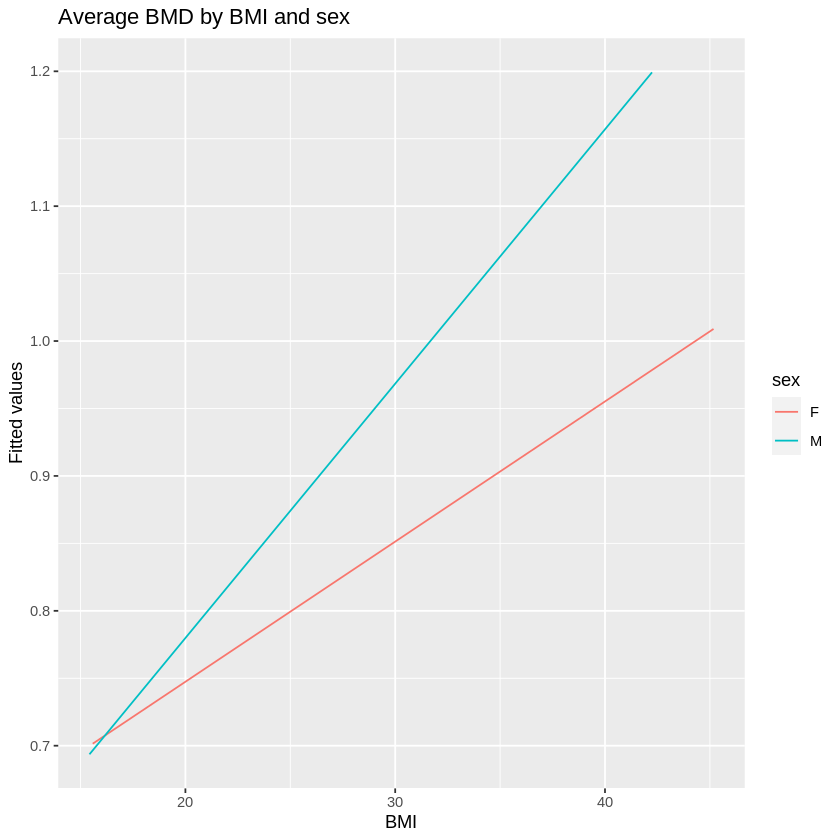

In [26]:
data$fitted = hipbmd.bmi_sex$fitted.values

ggplot(data = data, aes (x = bmi, y = fitted, group = sex, colour = sex)) + geom_line() +
  labs(title = "Average BMD by BMI and sex", 
    x = "BMI", y = "Fitted values")